In [1]:
import re
import requests
from bs4 import BeautifulSoup

In [2]:
site = "https://www.bbc.co.uk/news/business-41779341"
url = 'https://www.bbc.co.uk/news/world-europe-49345912'

In [3]:
response = requests.get(site)
soup = BeautifulSoup(response.text, "html.parser")  # create a new bs4 object from the html data loaded

for script in soup(["script", "style"]):  # remove all javascript and stylesheet code
    script.decompose()

text = ' '.join(soup.stripped_strings)
strs=[]
strs.append(text)

money_tokens = list()
for st in strs:
    money_string = st
    res = re.findall("(?:\d+[.,]?\d+[a-zA-Z]* [pPeEdD][uo][rlu]\w+|\d+[.,]?\d+[a-zA-Z]*p|[^\w\s+\-\"]\d+[.,]?\d+[a-zA-Z]*(?=[., )]))", money_string)
    if res != []:
        money_tokens += res


In [4]:
print(money_string)

US economy grows faster than expected in third quarter - BBC News BBC Homepage Skip to content Accessibility Help sign-in BBC Account alerts Notifications Home News Sport Weather iPlayer Sounds CBBC CBeebies Menu More caret-down search Search Home News Sport Weather iPlayer Sounds CBBC CBeebies Food Bitesize Arts Taster Local Three no Close menu BBC News list Menu Home Coronavirus US Election UK World Business Politics Tech Science Health Family & Education list More Entertainment & Arts Stories In Pictures Newsbeat Reality Check Long Reads Disability Business Your Money Market Data Companies Economy Global Car Industry Business of Sport US economy grows faster than expected in third quarter Published duration 27 October 2017 image copyright Getty Images image caption Spending on autos increased, helping US GDP to grow at 3% The US economy expanded at an annual pace of 3% during the three months to the end of September, which was stronger than expected. The growth extended the robust a

In [5]:
print(money_tokens)

['$131bn', '£100bn', '$100bn', '$17.4bn', '£300m']


In [6]:
with open("check.txt", "r", encoding="utf8") as file:
    strs = file.readlines()
    i = 0
while i < len(strs):
    res = re.findall("^\n$", strs[i])
    if res != []:
        strs.pop(i)
    i += 1

In [7]:
money_tokens = list()
for st in strs:
    money_string = st
    res = re.findall("(?:\d+[.,]?\d+[a-zA-Z]* [pPeEdD][uo][rlu]\w+|\d+[.,]?\d+[a-zA-Z]*p|[^\w\s+\-\"]\d+[.,]?\d+[a-zA-Z]*(?=[., )]))", money_string)#[^\w\s+-]\d+[.,]?\d+\w+
    print(money_string)
    if res != []:
        money_tokens += res

• (20%) Write a regular expression that can find all amounts of money in a text. Your expression

should be able to deal with different formats and currencies, for example £50,000 and

£117.3m as well as 30p, 500m euro, 338bn euros, $15bn and $92.88. Make sure that you can

at least detect amounts in Pounds, Dollars and Euros.


In [8]:
print(money_tokens)

['£50,000', '£117.3m', '30p', '500m euro', '338bn euros', '$15bn', '$92.88']


In [9]:
with open("bbc_text.txt", "r", encoding="utf8") as file:
    strs = file.readlines()
    i = 0
while i < len(strs):
    res = re.findall("^\n$", strs[i])
    if res != []:
        strs.pop(i)
    i += 1

In [10]:
money_tokens = list()
for st in strs:
    money_string = st
    res = re.findall("(?:\d+[.,]?\d+[a-zA-Z]* [pPeEdD][uo][rlu]\w+|\d+[.,]?\d+[a-zA-Z]*p|[^\w\s+\-\"]\d+[.,]?\d+[a-zA-Z]*(?=[., )]))", money_string)#[^\w\s+-]\d+[.,]?\d+\w+
    print(money_string)
    if res != []:
        money_tokens += res

US economy grows faster than expected in third quarter - BBC News BBC Homepage Skip to content Accessibility Help sign-in BBC Account alerts Notifications Home News Sport Weather iPlayer Sounds CBBC CBeebies Menu More caret-down search Search Home News Sport Weather iPlayer Sounds CBBC CBeebies Food Bitesize Arts Taster Local Three no Close menu BBC News list Menu Home Coronavirus US Election UK World Business Politics Tech Science Health Family & Education list More Entertainment & Arts Stories In Pictures Newsbeat Reality Check Long Reads Disability Business Your Money Market Data Companies Economy Global Car Industry Business of Sport US economy grows faster than expected in third quarter Published duration 27 October 2017 image copyright Getty Images image caption Spending on autos increased, helping US GDP to grow at 3% The US economy expanded at an annual pace of 3% during the three months to the end of September, which was stronger than expected. The growth extended the robust a

In [11]:
print(money_tokens)

['$131bn', '£100bn', '$100bn', '$17.4bn', '£21m']


In [12]:
strs=list()
with open("phone_numbers.txt", "r", encoding="utf8") as file:
    strs = file.readlines()
    print(*strs)
    res=list()
    print("\n")
for i in range(0,len(strs)):
    strs[i]=strs[i][:len(strs[i])-2] if strs[i].count("\n")>0 else strs[i]
    re_s=[(re.findall("[^\w]*\d+[^\w]*\d+[^\w]*\d+[^\w]?\d+",strs[i]))]
    re_s=[['']] if re_s==[[]] else re_s
    res=res+re_s
print("<=========Telephone numbers checking========>")
for i in range(0,len(res)):
    if res[i][0] == strs[i]:
        print(res[i][0],"==",strs[i]," Succes")
    else:
        print(res[i][0],"!=",strs[i]," Failure")


555.123.4565
 +1-(800)-545-2468
 2-(800)-545-2468
 3-800-545-2468
 555-123-3456
 555 222 3342
 (234) 234 2442
 (243)-234-2342
 1234567890
 123.456.7890
 123.4567
 123-4567
 1234567900
 12345678900


<=========Telephone numbers checking========>
555.123.456 == 555.123.456  Succes
+1-(800)-545-246 == +1-(800)-545-246  Succes
2-(800)-545-246 == 2-(800)-545-246  Succes
3-800-545-246 == 3-800-545-246  Succes
555-123-345 == 555-123-345  Succes
555 222 334 == 555 222 334  Succes
(234) 234 244 == (234) 234 244  Succes
(243)-234-234 == (243)-234-234  Succes
123456789 == 123456789  Succes
123.456.789 == 123.456.789  Succes
123.456 == 123.456  Succes
123-456 == 123-456  Succes
123456790 == 123456790  Succes
12345678900 == 12345678900  Succes


In [13]:
from nltk.book import *

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [14]:
text7.tokens[0:5]


['Pierre', 'Vinken', ',', '61', 'years']

In [15]:
from nltk import re

In [16]:
import string
txt7_tkns = text7.tokens

txt7_tkns_nopunct = [ ]
chars = re.escape(string.punctuation)
for word in txt7_tkns:
    fixed_word=re.sub(r'['+chars+']', "", word).lower()
    if fixed_word!="":
        txt7_tkns_nopunct.append(fixed_word)
txt7_tkns_nopunct[0:5]

['pierre', 'vinken', '61', 'years', 'old']

In [17]:
print(chars)

!"\#\$%\&'\(\)\*\+,\-\./:;<=>\?@\[\\\]\^_`\{\|\}\~


In [18]:
import nltk

In [19]:
freq_dist=nltk.FreqDist(txt7_tkns_nopunct)

In [20]:
import pandas as pd
import seaborn as sns

cm = sns.light_palette("red", as_cmap=True)

most_common_words_amount=50

data=[[word,float(u'{:.4f}'.format(counts/len(txt7_tkns_nopunct))),u'{} times'.format(counts)] 
      for word, counts in freq_dist.most_common(most_common_words_amount)]

df = pd.DataFrame(data)
df.index = range(1,most_common_words_amount+1)
df.columns = ["Word", "Frequency", "Counts"]
s = df.style.background_gradient(cmap=cm)
s

,Word,Frequency,Counts
1,the,0.054400,4764 times
2,of,0.026500,2325 times
3,to,0.024900,2182 times
4,a,0.022900,2006 times
5,in,0.020200,1769 times
6,and,0.017800,1556 times
7,1,0.013300,1166 times
8,0,0.012500,1099 times
9,s,0.009900,869 times
10,for,0.009700,853 times


In [21]:
freq_dist.most_common(most_common_words_amount)[7-1][0]

'1'

In [22]:
print(re.search("[^\w]+",freq_dist.most_common(most_common_words_amount)[0][0]))

None


In [23]:
import matplotlib.pyplot as plt
def plot_freqdist_freq(fd,
                       max_num=None,
                       cumulative=False,
                       title='Frequency plot',
                       linewidth=4):
    plt.figure(figsize=(20, 10))
    plt.rcParams.update({'font.size': 16})
    tmp = fd.copy()
    norm = fd.N()
    for key in tmp.keys():
        tmp[key] = float(fd[key]) / norm
    f= plt
    if max_num:
        f= tmp.plot(max_num, cumulative=cumulative,
                 title=title, linewidth=linewidth)

    else:
        f= tmp.plot(cumulative=cumulative,
                 title=title,
                 linewidth=linewidth)
    return

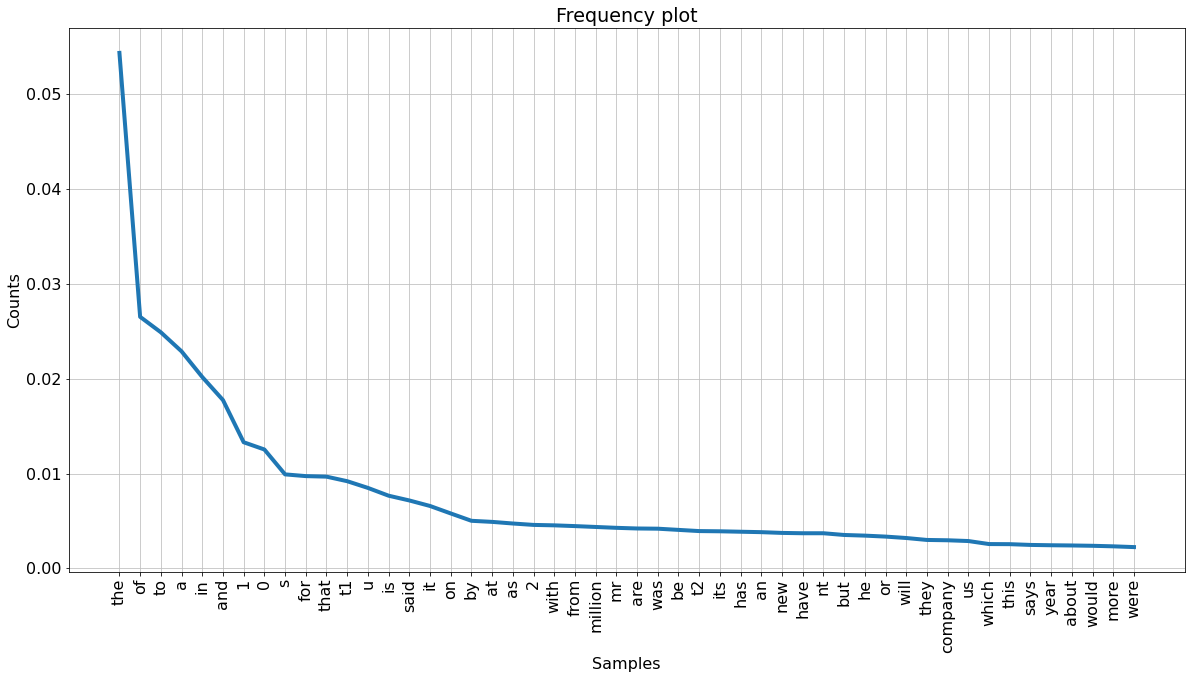

In [24]:
plot_freqdist_freq(freq_dist, max_num=most_common_words_amount)